# Exercise sheet 1

In this first exercise sheet, we're going to use the kNN classifier for the task of breast cancer detection. The dataset is available through sklearn. Let's load it.

In [2]:
# plt to plot figures
import matplotlib.pyplot as plt
# numpy for array/matrix operations
import numpy as np
# loading the dataset loader function from sklearn
from sklearn.datasets import load_breast_cancer

# we set a seed variable for functions that use randomization (e.g. when shuffling data samples)
# this way, we can have reproducible results even with randomization
RANDOM_STATE = 2

In [3]:
# loading the sklearn data object (python dictionary-style object)
data = load_breast_cancer()

### 1) Getting to know the dataset

Let's have a quick first look at how the dataset is structured, how many classes we have and the types of features that are provided. 

For more information on the sklearn (scikit-learn) library, see e.g. tutorials on:
https://scikit-learn.org/stable/tutorial/basic/tutorial.html

In [4]:
# Unrelated but maybe helpful: show class type of data (might clarify how to work with it)
print("Type of data: ", type(data))

# Check number and name of classes
print("Number of classes: ", len(np.unique(data['target'])))
print("Class names: ", data.target_names)

# features, target = data.data, data.target
X_all, y_all = data.data, data.target
# or with: features, target = load_breast_cancer(return_X_y=True)

print("Number of samples: ", X_all.shape[0])
print("Number of features: ", X_all.shape[1])

Type of data:  <class 'sklearn.utils._bunch.Bunch'>
Number of classes:  2
Class names:  ['malignant' 'benign']
Number of samples:  569
Number of features:  30


In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
# What kind of features?
print("Feature names:\n")
for idx, feature_name in enumerate(data.feature_names):
    print(idx, feature_name)

Feature names:

0 mean radius
1 mean texture
2 mean perimeter
3 mean area
4 mean smoothness
5 mean compactness
6 mean concavity
7 mean concave points
8 mean symmetry
9 mean fractal dimension
10 radius error
11 texture error
12 perimeter error
13 area error
14 smoothness error
15 compactness error
16 concavity error
17 concave points error
18 symmetry error
19 fractal dimension error
20 worst radius
21 worst texture
22 worst perimeter
23 worst area
24 worst smoothness
25 worst compactness
26 worst concavity
27 worst concave points
28 worst symmetry
29 worst fractal dimension


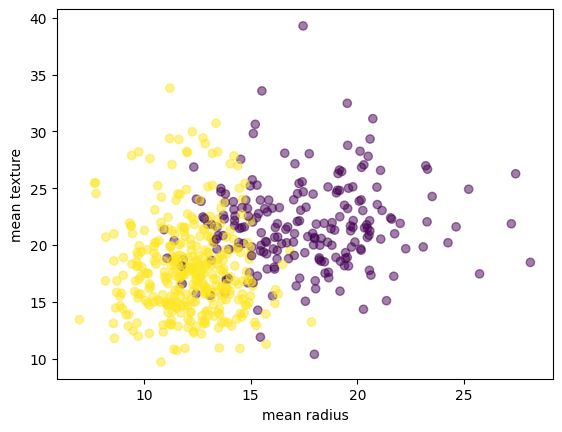

In [7]:
# example plot of two features (2D), mean texture and mean radius (features 0 and 1)
plt.scatter(data.data[:,0], data.data[:,1], c=data.target, alpha=0.5, cmap='viridis')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

### 2) Defining a train and test set

Before we can start training and evaluating a machine learning model, we need to split our data samples into a train and test set. A common split percentage is selecting samples at random and assigning 80% train and 20% test, so let's do that here.

#### (T2) Your task: Create a 80/20 train/test split and report the number of samples in each subset (train/test).

In [8]:
# sklearn contains a function that can shuffle and split the data into test and train sets
from sklearn.model_selection import train_test_split

# Make a train/test split using 20% test size; shuffle the data before sampling
# don't forget to set the random seed in the function

### YOUR CODE HERE START
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=RANDOM_STATE, shuffle = True)

# print the number of train and test samples
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))
### YOUR CODE HERE END

Number of train samples:  455
Number of test samples:  114


### 3) Training and evaluating a first model

Tackling a Machine Learning task is an iterative process. For most Machine Learning problems that you're going to working on, it will usually be helpful to get a first model up and running as soon as possible - and then iterate from there. This helps in getting to know the task and can give you useful and important insights early on. 

Building a (simple) model early in development is a great for getting a feel for your Machine Learning problem, so let's do that here with a kNN model.

#### (T3) Your task: Build a first kNN model with your dataset split from above. Use default parameters for the kNN. Report accuracy. 

In [9]:
# import KNN model class
from sklearn.neighbors import KNeighborsClassifier
# import function to calculate accuracy 
from sklearn.metrics import accuracy_score

In [10]:
### YOUR CODE HERE START
# instantiate knn model with k=5 (=default)
knn = KNeighborsClassifier()
# run fit method with the training data to "train" the KNN model
knn.fit(X_train, y_train)
# run predict method to classify samples in the test set
output = knn.predict(X_test)
# calculate accuracy on the predicted samples in the test set
acc = accuracy_score(y_test, output)
# print the accuracy as percentage of correctly classified samples in the test set (i.e. between 0%-100%)
print("Accuracy:", acc*100, "%")
### YOUR CODE HERE END

Accuracy: 91.22807017543859 %


#### 3.1) Note on evaluation metrics

For greatly imbalanced datasets the accuracy metric can be misleading. In such a case, other metrics, e.g. the "F1-score", might give us better insights into our model's performance. 

The Breast Cancer dataset is somewhat imbalanced: there are more "Benign" than "Malignant" samples, as we can see from the chance level accuracy.

#### (T3.1) Your task: Calculate and report "chance" level on your current dataset split. 

In [11]:
print("\nNumber of samples per class")

### YOUR CODE HERE START
# print number of samples per class in the entire dataset
print("Malignant (cancer) class total: ", np.count_nonzero(data.target==0))
print("Benign (non-cancer) class total: ", np.count_nonzero(data.target==1))
# print number of samples per class in the test set
print("Malignant (cancer) class test: ", np.count_nonzero(X_test==0))
print("Benign (non-cancer) class test: ", np.count_nonzero(X_test==1))

# "chance" is defined as the share of the largest class of your data-(sub)set  
# (=accuracy, if we always output the largest class as our prediction)
# calculate chance on your test set
chance_level = sum(y_test) / len(y_test)

# print "chance" on the percentage scale (i.e. between 0%-100%)
print("Chance level: ", chance_level*100, "%")
### YOUR CODE HERE END



Number of samples per class
Malignant (cancer) class total:  212
Benign (non-cancer) class total:  357
Malignant (cancer) class test:  12
Benign (non-cancer) class test:  1
Chance level:  60.526315789473685 %



We can get the F1-score per class with a function in sklearn.

#### (T3.2) Your task: Calculate and report Precision, Recall and F1-scores on your current dataset split. 

In [12]:
# import function for calculation of precision, recall, f1
from sklearn.metrics import classification_report
# get and print all results on your test set using classification_report

### YOUR CODE HERE START
result = classification_report(y_test, output)
print(result)
### YOUR CODE HERE END

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.93      0.93      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



### 4) Data normalization

Training a model with features that came from various sources or are represented on different scales can cause issues for your learning algorithm. A common way to alleviate this issue is to standardize your data to have zero mean and unit standard deviation (std=1). This is done for each feature (=dimension) of your dataset. Mean and std of each feature are determined on the train set and then used to standardize both train and test samples using e.g. Z-normalization. 

Let's first take a look at our data and check if there is potentially a problem with different scales for different features: 

####  (T4) Your task: Create and then manually compare histograms for features "mean radius", "mean texture" and "mean compactness".

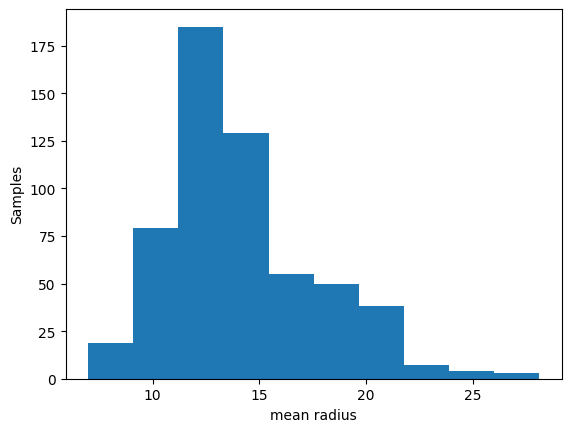

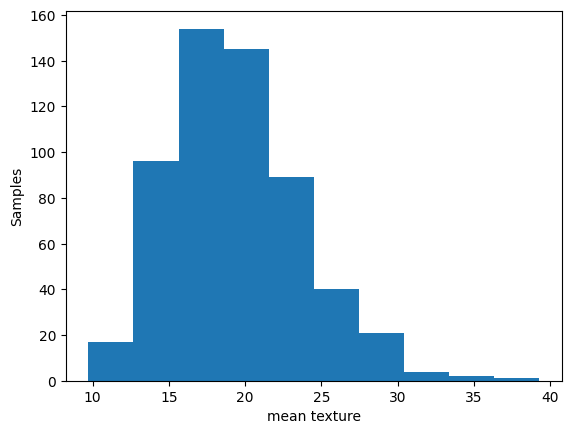

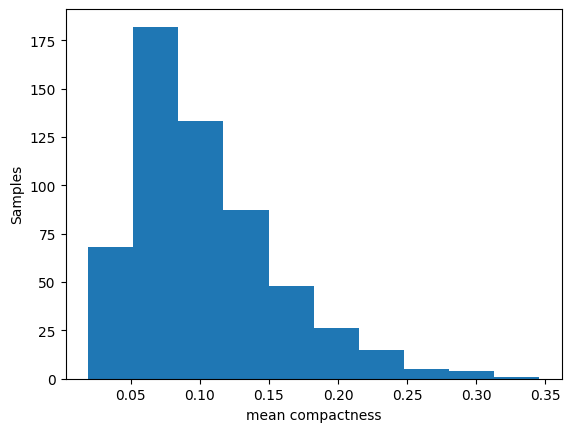

In [13]:
### YOUR CODE HERE START
# mean radius
plt.hist(data.data[:,0])
plt.xlabel("mean radius")
plt.ylabel("Samples")
plt.show()

# mean texture
plt.hist(data.data[:,1])
plt.xlabel("mean texture")
plt.ylabel("Samples")
plt.show()

# mean compactness
plt.hist(data.data[:,5])
plt.xlabel("mean compactness")
plt.ylabel("Samples")
plt.show()
### YOUR CODE HERE END

While features "mean radius" and "mean texture" are on similar scales, mean compactness is not. There might be potential when standardizing the dataset.

We don't have to re-implement the scaling function, as it is already available in sklearn.

####  (T4.1) Your task: Apply z-normalization on the dataset split and evaluate. Report accuracy when using k={1,5,15} in your kNN classifier.

In [14]:
# import class used to apply z-normalization on your dataset
from sklearn.preprocessing import StandardScaler

### YOUR CODE HERE START
# instantiate the scaler
scaler = StandardScaler()
# use the scaler's fit method to calculate mean and standard deviation of your train(!) set 
scaler.fit(X_train)
# apply transform method to standardize your data subsets
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

# re-run KNN training and classification and evaluation
for k in [1, 5, 15]:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_standardized, y_train)
    output = knn.predict(X_test_standardized)
    acc = accuracy_score(y_test, output)

    # get chance level of test set

    chance_level = sum(y_test) / len(y_test) # Tutorium fragen (Chance level)

    # print accuracy and chance level of your newly produced test results
    print("Acc (Chance):", "kNN with k =", k, "has accuracy of", acc, "and chance level of", chance_level*100, "%")

Acc (Chance): kNN with k = 1 has accuracy of 0.956140350877193 and chance level of 60.526315789473685 %
Acc (Chance): kNN with k = 5 has accuracy of 0.9736842105263158 and chance level of 60.526315789473685 %
Acc (Chance): kNN with k = 15 has accuracy of 0.9649122807017544 and chance level of 60.526315789473685 %


### 5) Training and evaluating with small datasets

When there is only a limited amount of data available for our task, we might face the dilemma of whether to prioritize training or testing (by creating a larger or smaller test set). Additionally, a randomly selected train/test split of our data might be suboptimal and inaccurately reflect the task's given data distribution. In such a case, a technique called k-fold cross-validation can benefit your development.

#### (T5) Your task: Run k-fold cross validation on your dataset and report mean/std accuracy over 10 splits.

In [14]:
# import k-fold cross validation class to automatically create randomized splits of the dataset
from sklearn.model_selection import KFold

### YOUR CODE HERE START
# define parameters for k-fold cross validation: 10 splits with shuffling; 
# also set random seed ("random_state") to our global RANDOM_STATE variable for reproducible/comparable results
kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
# create the splits with KFold's get_n_splits method
kf.get_n_splits(data.data)
# we initialize an empty list to store accuracy numbers for each split
acc_list = []
# run KNN training, testing and accuracy evaluation for each split 
for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = data.data[train_index], data.data[test_index]
    y_train_split, y_test_split = data.target[train_index], data.target[test_index]

    knn = KNeighborsClassifier()
    knn.fit(X_train_split, y_train_split)
    output = knn.predict(X_test_split)
    acc = accuracy_score(y_test_split, output)
    acc_list.append(acc)
    
    # chance level of the current test set
    
    chance_level = sum(y_test_split) / len(y_test_split)
    
        # print acc and chance level for each split
    print("Split {:02}\tAcc (Chance): ", chance_level*100, "%",) # Tutorium fragen (Split :02)

# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds:", np.mean(acc_list), "(", np.std(acc_list), ")")
### YOUR CODE HERE END


Split {:02}	Acc (Chance):  68.42105263157895 %
Split {:02}	Acc (Chance):  52.63157894736842 %
Split {:02}	Acc (Chance):  61.40350877192983 %
Split {:02}	Acc (Chance):  63.1578947368421 %
Split {:02}	Acc (Chance):  61.40350877192983 %
Split {:02}	Acc (Chance):  56.14035087719298 %
Split {:02}	Acc (Chance):  66.66666666666666 %
Split {:02}	Acc (Chance):  73.68421052631578 %
Split {:02}	Acc (Chance):  63.1578947368421 %
Split {:02}	Acc (Chance):  60.71428571428571 %

Accuracy mean (std) over 10 folds: 0.9333020050125314 ( 0.04350745859286764 )


### 6) Putting it all together

Let's now combine normalization and k-fold cross validation and see if we can get better results.

#### (T6) Your task: Run k-fold cross validation on your dataset and report mean/std accuracy over 10 splits. Each split should be z-normalized based on their mean/std. Report mean/std (standard deviation) of accuracy over 10 splits.

In [15]:
### YOUR CODE HERE START
# use previous code examples to code this part
kf = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
kf.get_n_splits(data.data)
acc_list = []

for split_n, (train_index, test_index) in enumerate(kf.split(X_all), 1):
    X_train_split, X_test_split = data.data[train_index], data.data[test_index]
    y_train_split, y_test_split = data.target[train_index], data.target[test_index]
    
    # z-normalization
    scaler = StandardScaler()
    scaler.fit(X_train_split)
    
    X_train_standardized = scaler.transform(X_train_split)
    X_test_standardized = scaler.transform(X_test_split)
    
    # knn-training
    knn = KNeighborsClassifier()
    knn.fit(X_train_standardized, y_train_split)
    output = knn.predict(X_test_standardized)
    acc = accuracy_score(y_test_split, output)
    acc_list.append(acc)
    
    # chance level of the current test set
    
    chance_level = sum(y_test_split) / len(y_test_split)
    
    # print acc and chance level for each split
    
    print("Split {:02}\tAcc (Chance): ", chance_level*100, "%",)
    
# print mean and standard deviation of accuracy over all splits
print("\nAccuracy mean (std) over 10 folds:", np.mean(acc_list), "(", np.std(acc_list), ")")

### YOUR CODE HERE END

Split {:02}	Acc (Chance):  68.42105263157895 %
Split {:02}	Acc (Chance):  52.63157894736842 %
Split {:02}	Acc (Chance):  61.40350877192983 %
Split {:02}	Acc (Chance):  63.1578947368421 %
Split {:02}	Acc (Chance):  61.40350877192983 %
Split {:02}	Acc (Chance):  56.14035087719298 %
Split {:02}	Acc (Chance):  66.66666666666666 %
Split {:02}	Acc (Chance):  73.68421052631578 %
Split {:02}	Acc (Chance):  63.1578947368421 %
Split {:02}	Acc (Chance):  60.71428571428571 %

Accuracy mean (std) over 10 folds: 0.9683583959899748 ( 0.018907880939793505 )


# 7) Q&A (Bonus Points)      Due: Fri, 12.05.23, 23:59

#### (T7) Your task: Answer the questions below and give explanations where required. 

7.1) What is "K" in KNN algorithm?  
The number of nearest neighbors to consider in the algorithm

7.2) How can we decide the value of "K" in the KNN algorithm?  
For two classes preferably odd. If the number of samples is high enough, a common rule of thumb is to set "k" to the square root of the number of samples in the training dataset. Also a lot of trial and error

7.3) Why is the KNN algorithm called a "Lazy Learner"?
Because it does not learn from the training set immediately, instead it stores the dataset and at the time of classification, it performs an action on the dataset.

7.4) Is the KNN algorithm a parametric or non-parametric model? Explain your answer.  
The k-NN algorithm is non-parametric because it does not make any assumptions about the underlying distribution of the data. Instead, it learns the function directly from the data, by simply memorizing the training set.

7.5) Is the KNN algorithm suitable for large datasets? Explain your answer.  
The KNN algorithm can be computationally expensive, because it requires calculating the distances between the query point and all the points in the dataset, which can be very time-consuming for large datasets.

7.6) Can the KNN algorithm run into the "overfitting" problem? Explain your answer.  
Yes, the algorithm can run into the "overfitting" problem, especially when the value of "k" is too small, causing the algorithm to become overly sensitive to noise in the training data.

7.7) Imagine an automated vehicle that classifies the color-state of a traffic light (green vs red for simplification). Which metrics can be used to evaluate the classifier to minimize dangerous behavior (i.e. driving while traffic light shows "red"). Explain your answer.  
A metric that is very useful in this scenario is the accuracy score, because it measures the proportion of correctly classified traffic light colors, in this case the proportion of times the classifier correctly identifies the traffic light as green or red.  
Also the F1-Score provides a balanced evaluation of the classifier's performance. A high F1 score is desirable to ensure that the classifier performs well in both precision and recall.

7.8) For a K-Fold Cross Validation on N samples in your dataset: How many samples are used for training and testing in each split?  
During each iteration of K-Fold Cross Validation, the samples in one split are used as the testing set, while the samples in the remaining K-1 splits are used as the training set.